<a href="https://colab.research.google.com/github/pouyan6/https-proxy-server/blob/master/MainTrade_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trade Modelling
Try to model SP Future in 1 mintues interval

## Import packages

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import datetime
import math
from sklearn.metrics import mean_squared_error


## Load tanseorboard extension


In [2]:
%reload_ext tensorboard


## Visualizes time series data

In [3]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(100, 10))

    # Check if there are more than two series to plot
    if type(y) is tuple:

        # Loop over the y elements
        for y_curr in y:

            # Plot the x and current y values
            plt.plot(x[start:end], y_curr[start:end], format)

    else:
        # Plot the x and y values
        plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
        plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

## Load Data function
  loading trades From CSV

In [4]:
def load_trades():
    t = []
    time_step = []
    trades = []
    format_str = "%Y%m%d %H%M%S"
    # with open('./ES_Data_1.csv') as csvfile:
    with open('./ES5000.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        # Append row and sunspot number to lists
        for row in reader:
            # datetime_obj = datetime.strptime(row[0], format_str)
            # time_step.append(datetime_obj)
            t.append(float(row[0].replace(" ","")))
            time_step.append(row[1])
            trades.append(float(row[2]))
    # Convert lists to numpy arrays

    time_series = np.array(time_step)
    closing_prices = np.array(trades)
    return time_series, closing_prices,t

## Load Data

In [6]:
time, series, times = load_trades()
close_prices = pd.DataFrame(series, index=time, columns=['Close'])
# print(close_prices)


           Close
871.0     876.75
862.5     877.50
870.0     873.75
863.75    871.75
866.5     867.75
...          ...
4420.5   4436.75
4379.25  4396.00
4382.5   4421.00
4410.25  4440.00
4400.0   4465.75

[5155 rows x 1 columns]


## Plot the Dataset

Text(0, 0.5, 'Prices ($)')

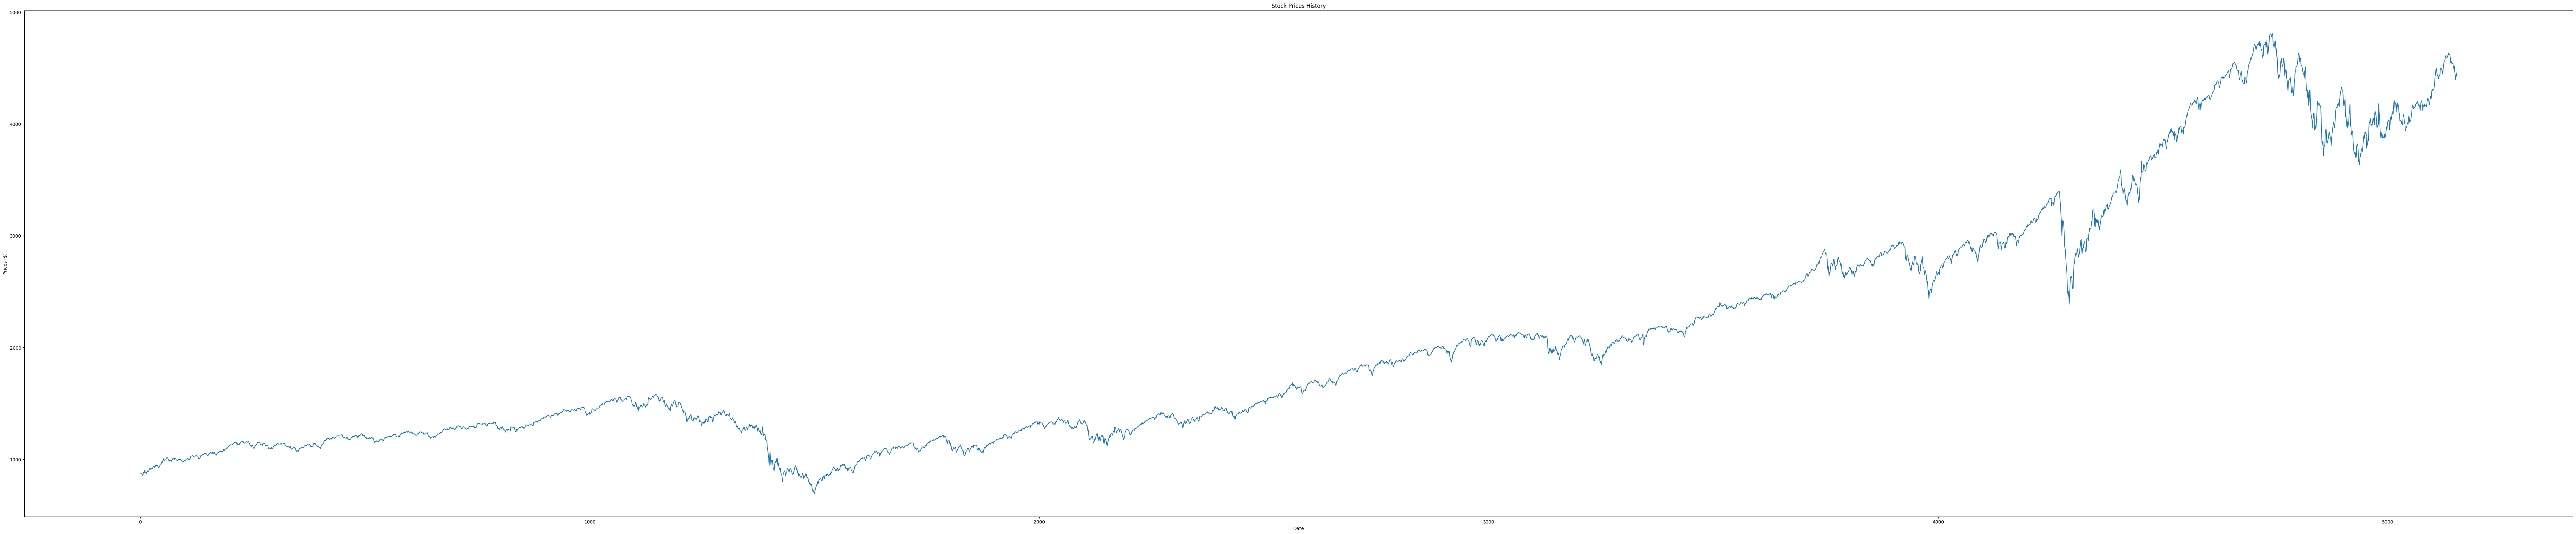

In [7]:
# Define the split time
# Preview the data
# plot_series(time, series, xlabel='Minutes', ylabel='Closing Price')

plt.figure(figsize=(100, 20))
plt.title('Stock Prices History')
plt.plot(series)
plt.xlabel('Date')
plt.ylabel('Prices ($)')


# windowed_dataset

In [8]:
def windowed_dataset(data, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      data (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(data)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

## Data Spliting

In [9]:
# Define the split time

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(series.reshape(-1,1))
# print(scaled_data.shape)

train_size = int(len(scaled_data)*0.80)
test_size = len(scaled_data) - train_size

# Get the train/test set
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:len(scaled_data),:1]

print(train_data.shape)
print(test_data.shape)

(4124, 1)
(1031, 1)


# Create DataSet

In [10]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

## Old Process

In [12]:
# Parameters
window_size = 30
batch_size = 32
shuffle_buffer_size = 100
split_time = 4000

# print(scaled_data.shape)
# train_data = scaled_data[0: split_time, :]

# x_train = []
# y_train = []

# # for i in range(60, len(train_data)):
# for i in range(len(train_data)):
#     x_train.append(train_data[i-60:i, 0])
#     y_train.append(train_data[i, 0])

# x_train, y_train = np.array(x_train), np.array(y_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# # Generate the dataset windows
# train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


time_step = 100
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)


(4023, 100)
[[0.04424456 0.04442689 0.04351525 ... 0.07049957 0.07177586 0.07262672]
 [0.04442689 0.04351525 0.04302905 ... 0.07177586 0.07262672 0.07220129]
 [0.04351525 0.04302905 0.04205664 ... 0.07262672 0.07220129 0.07238361]
 ...
 [0.51519387 0.5126413  0.51112192 ... 0.56612374 0.56569831 0.56357117]
 [0.5126413  0.51112192 0.51075726 ... 0.56569831 0.56357117 0.56168713]
 [0.51112192 0.51075726 0.51379604 ... 0.56357117 0.56168713 0.56278109]]
(930, 100)
(930,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Build the Model

In [13]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1),
])

# model = tf.keras.models.Sequential([
    # tf.keras.layers.Conv1D(filters=64, kernel_size=3,
    #                        strides=1,
    #                        activation="relu",
    #                        padding='causal',
    #                        input_shape=[window_size, 1]),
    # tf.keras.layers.LSTM(100, return_sequences=True, input_shape=([window_size, 1])),
    # tf.keras.layers.LSTM(100),
    # tf.keras.layers.Dense(30, activation="relu"),
    # tf.keras.layers.Dense(10, activation="relu"),
    # tf.keras.layers.Dense(1),
    # tf.keras.layers.Lambda(lambda x: x * 400)
# ])
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[window_size]),
#     # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(1)
# ])

# !rm -rf ./logs/

# model = tf.keras.models.Sequential([
#   tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)),
#   tf.keras.layers.LSTM(100, return_sequences=False),
#   tf.keras.layers.Dense(25),
#   tf.keras.layers.Dense(1)
# ])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Tune the Learning Rate

In [35]:
init_weights = model.get_weights()
# print(init_weights)

In [ ]:
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(x_train, y_train, batch_size= 1, epochs=3)

In [14]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# # Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)

# # Set the training parameters
# model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['accuracy'])
model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
history = model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 100,batch_size = 64,verbose = 1)

# model.fit(train_set, epochs=20, callbacks=[lr_schedule])


Epoch 1/100
63/63 [==============================] - 13s 35ms/step - loss: 0.0042 - val_loss: 0.0010
Epoch 2/100
63/63 [==============================] - 1s 17ms/step - loss: 9.6614e-05 - val_loss: 0.0011
Epoch 3/100
63/63 [==============================] - 1s 17ms/step - loss: 9.4023e-05 - val_loss: 0.0012
Epoch 4/100
63/63 [==============================] - 1s 17ms/step - loss: 9.0929e-05 - val_loss: 0.0017
Epoch 5/100
63/63 [==============================] - 1s 19ms/step - loss: 8.7556e-05 - val_loss: 0.0014
Epoch 6/100
63/63 [==============================] - 1s 24ms/step - loss: 9.1353e-05 - val_loss: 0.0017
Epoch 7/100
63/63 [==============================] - 1s 19ms/step - loss: 8.7370e-05 - val_loss: 0.0015
Epoch 8/100
63/63 [==============================] - 1s 16ms/step - loss: 8.4082e-05 - val_loss: 0.0011
Epoch 9/100
63/63 [==============================] - 1s 17ms/step - loss: 8.4531e-05 - val_loss: 9.5165e-04
Epoch 10/100
63/63 [==============================] - 1s 16ms/s

In [15]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# print(test_predict)
# transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
# print(test_predict)
print(math.sqrt(mean_squared_error(Y_train,train_predict)))
print(math.sqrt(mean_squared_error(Y_test,test_predict)))

30/30 [==============================] - 0s 6ms/step
1728.6381405607126
3932.7200163596717


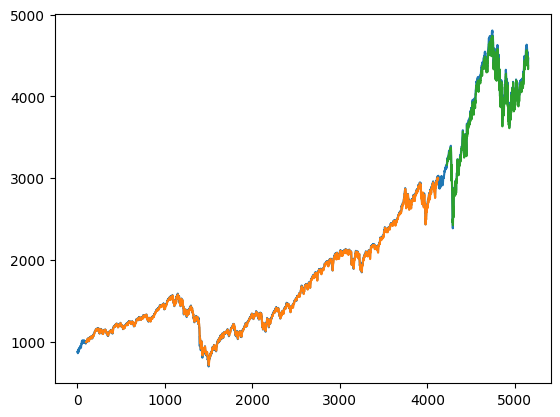

In [16]:
look_back = 100


trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict)+look_back,:] = train_predict


testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back)*2 + 1 : len(scaled_data) - 1,:] = test_predict

plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Plot Result

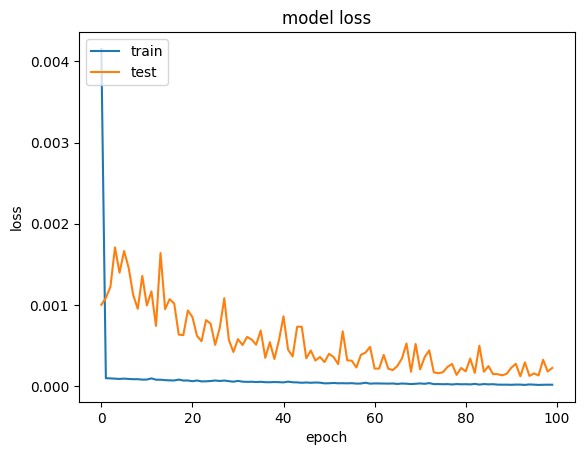

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()